### Table of Contents

* [Data Exploration (EDA)](#chapter1)
    * .[Missing value treatment](#section_1_1_1)
    * .[Outlier treatment](#section_1_1_2)
    * .[Explanatory analysis of features and their relation to target](#section_1_1_3)
* [Modelling](#chapter2)
    * [Logistic Regression](#section_2_1)
    * [Random Forest](#section_2_3)
* [Model Comparision](#chapter3) 
* [Maximize Chosen Model Performance](#chapter4) 
    * .[Option1: Finetune Parameters Using Gridsearch](#section_4_1_1)
    * .[Option2: Using Feature selection before training model](#section_4_1_2)
* [Understand The Chosen Model](#chapter5) 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import xgboost as xgb

In [2]:
df = pd.read_csv('C:/Users/trangquyen/Documents/Học code/it_data.csv')

In [3]:
df.head()

,ID_APPLICATION,TIME,NUMERICAL_0,NUMERICAL_1,NUMERICAL_2,NUMERICAL_3,NUMERICAL_4,NUMERICAL_5,NUMERICAL_6,NUMERICAL_7,...,CATEGORICAL_2,CATEGORICAL_3,CATEGORICAL_4,CATEGORICAL_5,CATEGORICAL_6,CATEGORICAL_7,CATEGORICAL_8,CATEGORICAL_9,CATEGORICAL_10,TARGET
0,0,2014-06-20 11:03:04,0.548205,6.273278,-0.557716,-0.086105,-0.726799,-0.523021,0.571528,0.176804,...,AB,DF,JK,TR,C,A,BB,AA,NFAYV,1
1,1,2014-06-20 11:05:39,-0.640991,5.662506,0.050086,0.233125,0.482266,0.085460,-0.552130,-0.017248,...,AA,DF,JK,WE,A,A,AA,BB,NFAYV,0
2,2,2014-06-20 11:07:00,0.394312,5.782492,-0.421450,0.756713,0.408276,0.327221,-0.905630,-0.941560,...,AB,AS,GH,TR,C,C,BB,BB,NFAYV,0
3,3,2014-06-20 11:09:38,-0.320658,4.736009,0.334894,1.092682,0.646294,1.541267,0.966884,-0.790725,...,AB,AS,GH,TR,A,A,AA,BB,HNPAK,0
4,4,2014-06-20 11:11:10,0.433235,5.323432,0.826207,0.718267,-1.627944,2.203108,0.420342,-0.223997,...,NaN,NaN,NaN,NaN,B,B,BB,BB,NFAYV,0


### Data Exploration (EDA) <a class="anchor" id="chapter1"></a>

In [4]:
df.dtypes

ID_APPLICATION      int64
TIME               object
NUMERICAL_0       float64
NUMERICAL_1       float64
NUMERICAL_2       float64
NUMERICAL_3       float64
NUMERICAL_4       float64
NUMERICAL_5       float64
NUMERICAL_6       float64
NUMERICAL_7       float64
NUMERICAL_8       float64
NUMERICAL_9       float64
NUMERICAL_10      float64
NUMERICAL_11      float64
NUMERICAL_12      float64
NUMERICAL_13      float64
NUMERICAL_14      float64
NUMERICAL_15      float64
NUMERICAL_16      float64
NUMERICAL_17      float64
NUMERICAL_18      float64
NUMERICAL_19      float64
NUMERICAL_20      float64
NUMERICAL_21      float64
NUMERICAL_22      float64
NUMERICAL_23      float64
NUMERICAL_24      float64
NUMERICAL_25      float64
NUMERICAL_26      float64
NUMERICAL_27      float64
NUMERICAL_28      float64
NUMERICAL_29      float64
NUMERICAL_30      float64
NUMERICAL_31      float64
NUMERICAL_32      float64
NUMERICAL_33      float64
NUMERICAL_34      float64
NUMERICAL_35      float64
NUMERICAL_36

In [5]:
df.shape

(200000, 56)

In [6]:
df['ID_APPLICATION'].nunique()

200000

In [7]:
#no duplicate cusid 

In [8]:
df['TIME'].max()

'2015-05-31 23:23:25'

In [9]:
df['TIME'].min()

'2014-06-20 11:03:04'

In [10]:
df.TARGET.value_counts()

0    128222
1     71778
Name: TARGET, dtype: int64

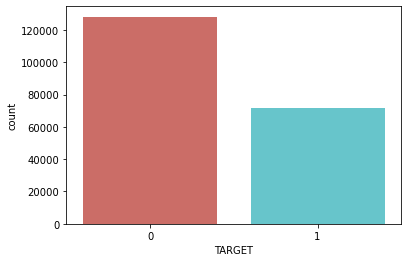

In [11]:
sns.countplot(x = 'TARGET', data = df, palette ='hls')
plt.show()

number of numeric field:  42


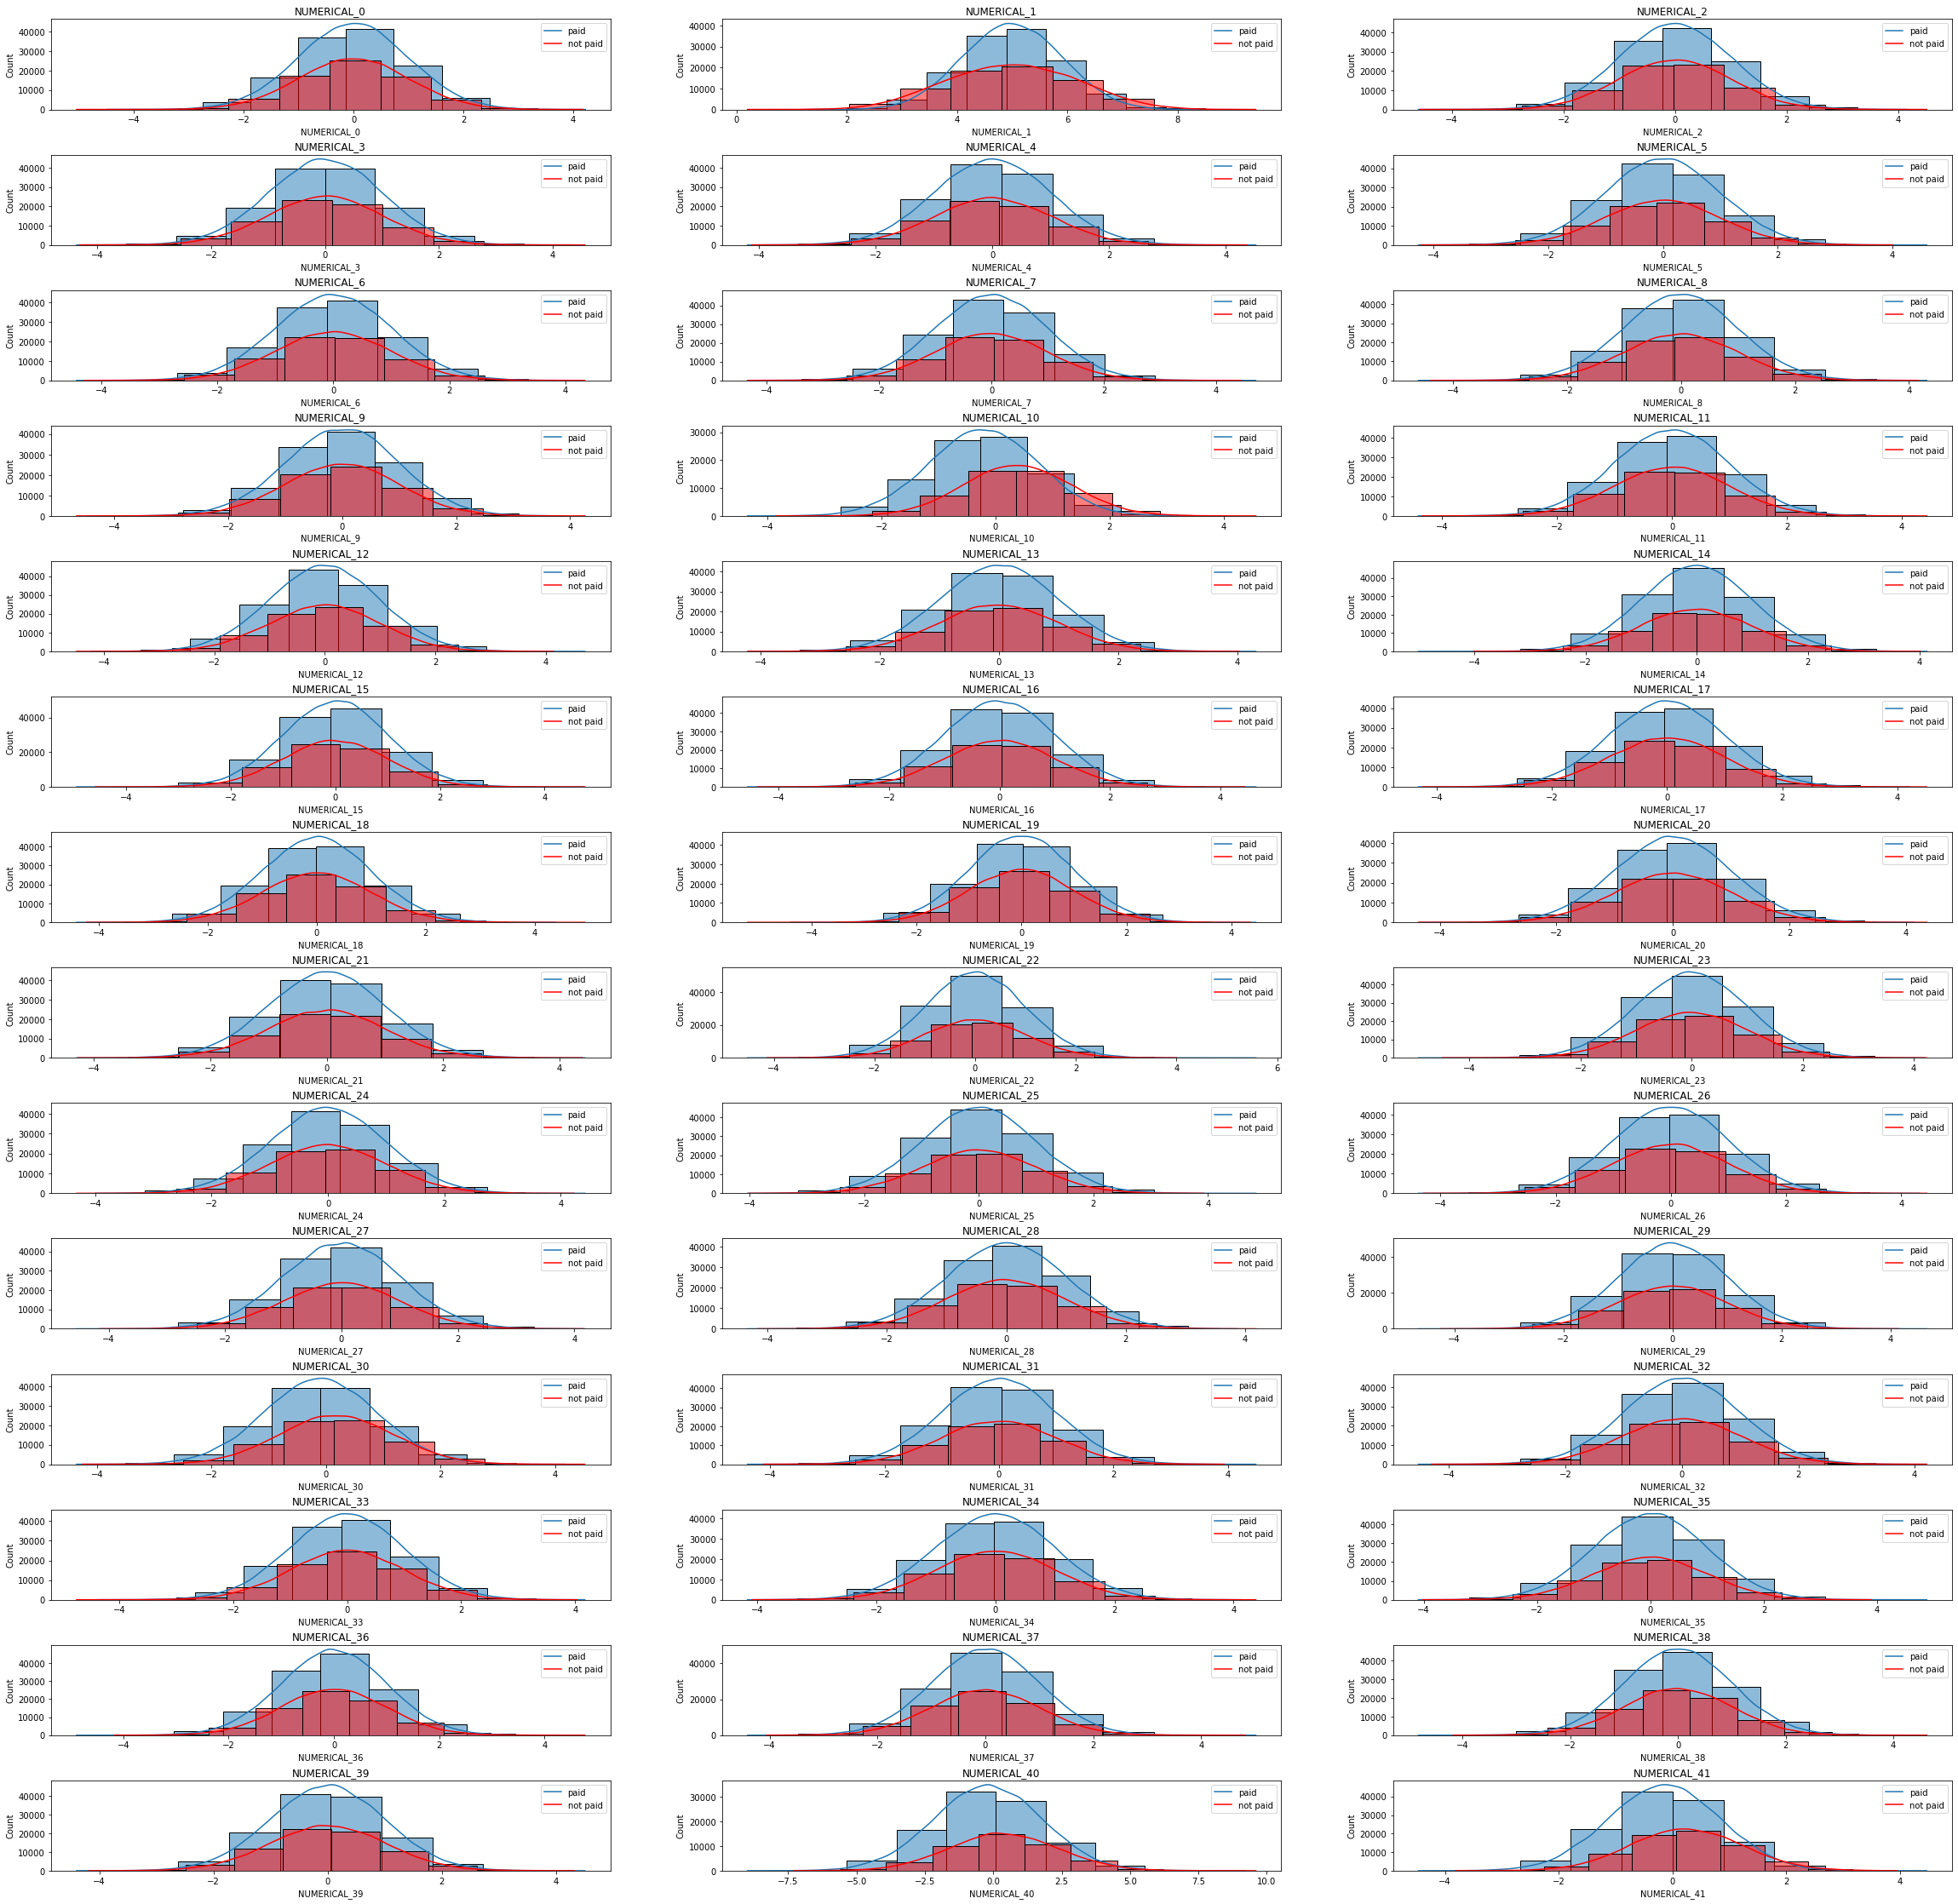

In [12]:
#Biến liên tục vs biến mục tiêu
numeric_cols = df.select_dtypes(include=['float']).columns

def _plot_numeric_classes(col, bins=10, kde=True):
    sns.histplot(df[col][df['TARGET'] == 0],
                 bins = bins,
                 kde = kde)
    sns.histplot(df[col][df['TARGET'] == 1],
                 bins = bins,
                 kde = kde,color='red')
    plt.legend(['paid', 'not paid'])

def _distribution_numeric(numeric_cols, row= 14, col=3, figsize=(40, 40), bins = 10):
    
    print('number of numeric field: ', len(numeric_cols))
    
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        break

_distribution_numeric(numeric_cols, row= 14, col=3, figsize=(40, 40), bins = 10)

In [13]:
#missing value detection 
missing_data = pd.DataFrame({"Missing value": df.isnull().sum()/ len(df.index)*100})
missing_data.reset_index()

,index,Missing value
0,ID_APPLICATION,0.0000
1,TIME,0.0000
2,NUMERICAL_0,0.0000
3,NUMERICAL_1,0.0000
4,NUMERICAL_2,0.0000
5,NUMERICAL_3,0.0000
6,NUMERICAL_4,0.0000
7,NUMERICAL_5,0.0000
8,NUMERICAL_6,0.0000
9,NUMERICAL_7,0.0000


In [14]:
#Numerical_10; Numerical_40; CATEGORICAL_2,CATEGORICAL_3, CATEGORICAL_4, CATEGORICAL_5 will be removed due to high percentage of missing value

In [15]:
#outlier detection

In [16]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [17]:
OL = find_outliers_IQR(df)

C:\Users\TRANGQ~1\AppData\Local\Temp/ipykernel_14600/2500755072.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


In [18]:
outlier_data = pd.DataFrame({"Outlier value": 100 - (OL.isnull().sum()/ len(df.index)*100)})
outlier_data.reset_index()

,index,Outlier value
0,ID_APPLICATION,0.0000
1,TIME,0.0000
2,NUMERICAL_0,0.6695
3,NUMERICAL_1,0.6910
4,NUMERICAL_2,0.6580
5,NUMERICAL_3,0.6780
6,NUMERICAL_4,0.6770
7,NUMERICAL_5,0.7110
8,NUMERICAL_6,0.6990
9,NUMERICAL_7,0.7225


In [19]:
df = df.drop(['NUMERICAL_10','NUMERICAL_40','CATEGORICAL_2','CATEGORICAL_3','CATEGORICAL_4','CATEGORICAL_5'],axis=1)

#### Missing value treatment <a class="anchor" id="section_1_1_1"></a>

In [20]:
for col_name in df.columns[0:-1]:
    if df[col_name].dtypes == 'object':
        df[col_name].fillna('Missing', inplace=True)
    else:
        df[col_name].fillna(df[col_name].mean(), inplace=True)
df.head()

,ID_APPLICATION,TIME,NUMERICAL_0,NUMERICAL_1,NUMERICAL_2,NUMERICAL_3,NUMERICAL_4,NUMERICAL_5,NUMERICAL_6,NUMERICAL_7,...,NUMERICAL_39,NUMERICAL_41,CATEGORICAL_0,CATEGORICAL_1,CATEGORICAL_6,CATEGORICAL_7,CATEGORICAL_8,CATEGORICAL_9,CATEGORICAL_10,TARGET
0,0,2014-06-20 11:03:04,0.548205,6.273278,-0.557716,-0.086105,-0.726799,-0.523021,0.571528,0.176804,...,-1.256936,1.433575,JJUFY,DVSOM,C,A,BB,AA,NFAYV,1
1,1,2014-06-20 11:05:39,-0.640991,5.662506,0.050086,0.233125,0.482266,0.085460,-0.552130,-0.017248,...,0.434467,-0.022775,IMFRD,OMFDE,A,A,AA,BB,NFAYV,0
2,2,2014-06-20 11:07:00,0.394312,5.782492,-0.421450,0.756713,0.408276,0.327221,-0.905630,-0.941560,...,-0.491451,0.128277,FPTCW,DVSOM,C,C,BB,BB,NFAYV,0
3,3,2014-06-20 11:09:38,-0.320658,4.736009,0.334894,1.092682,0.646294,1.541267,0.966884,-0.790725,...,-0.323530,-0.134636,UQPEF,DVSOM,A,A,AA,BB,HNPAK,0
4,4,2014-06-20 11:11:10,0.433235,5.323432,0.826207,0.718267,-1.627944,2.203108,0.420342,-0.223997,...,-0.162953,-0.472046,IMFRD,OMFDE,B,B,BB,BB,NFAYV,0


In [21]:
df.columns

Index(['ID_APPLICATION', 'TIME', 'NUMERICAL_0', 'NUMERICAL_1', 'NUMERICAL_2',
       'NUMERICAL_3', 'NUMERICAL_4', 'NUMERICAL_5', 'NUMERICAL_6',
       'NUMERICAL_7', 'NUMERICAL_8', 'NUMERICAL_9', 'NUMERICAL_11',
       'NUMERICAL_12', 'NUMERICAL_13', 'NUMERICAL_14', 'NUMERICAL_15',
       'NUMERICAL_16', 'NUMERICAL_17', 'NUMERICAL_18', 'NUMERICAL_19',
       'NUMERICAL_20', 'NUMERICAL_21', 'NUMERICAL_22', 'NUMERICAL_23',
       'NUMERICAL_24', 'NUMERICAL_25', 'NUMERICAL_26', 'NUMERICAL_27',
       'NUMERICAL_28', 'NUMERICAL_29', 'NUMERICAL_30', 'NUMERICAL_31',
       'NUMERICAL_32', 'NUMERICAL_33', 'NUMERICAL_34', 'NUMERICAL_35',
       'NUMERICAL_36', 'NUMERICAL_37', 'NUMERICAL_38', 'NUMERICAL_39',
       'NUMERICAL_41', 'CATEGORICAL_0', 'CATEGORICAL_1', 'CATEGORICAL_6',
       'CATEGORICAL_7', 'CATEGORICAL_8', 'CATEGORICAL_9', 'CATEGORICAL_10',
       'TARGET'],
      dtype='object')

#### Outlier treatment <a class="anchor" id="section_1_1_2"></a>

In [22]:
def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,upper,

       np.where( df < lower,

           lower,

           df

           )

       )

   return df

In [23]:
df =  df.apply(lambda x: impute_outliers_IQR(df) if x.name in ['NUMERICAL_0', 'NUMERICAL_1', 'NUMERICAL_2',
       'NUMERICAL_3', 'NUMERICAL_4', 'NUMERICAL_5', 'NUMERICAL_6',
       'NUMERICAL_7', 'NUMERICAL_8', 'NUMERICAL_9', 'NUMERICAL_11',
       'NUMERICAL_12', 'NUMERICAL_13', 'NUMERICAL_14', 'NUMERICAL_15',
       'NUMERICAL_16', 'NUMERICAL_17', 'NUMERICAL_18', 'NUMERICAL_19',
       'NUMERICAL_20', 'NUMERICAL_21', 'NUMERICAL_22', 'NUMERICAL_23',
       'NUMERICAL_24', 'NUMERICAL_25', 'NUMERICAL_26', 'NUMERICAL_27',
       'NUMERICAL_28', 'NUMERICAL_29', 'NUMERICAL_30', 'NUMERICAL_31',
       'NUMERICAL_32', 'NUMERICAL_33', 'NUMERICAL_34', 'NUMERICAL_35',
       'NUMERICAL_36', 'NUMERICAL_37', 'NUMERICAL_38', 'NUMERICAL_39',
       'NUMERICAL_41'] else x, axis=1)


#### Explanatory analysis of features and their relation to target <a class="anchor" id="section_1_1_3"></a>

In [24]:
df_1 = df.copy()
df_1['CATEGORICAL_0'] =df_1['CATEGORICAL_0'].astype('category').cat.codes
df_1['CATEGORICAL_1'] =df_1['CATEGORICAL_1'].astype('category').cat.codes
df_1['CATEGORICAL_6'] =df_1['CATEGORICAL_6'].astype('category').cat.codes
df_1['CATEGORICAL_7'] =df_1['CATEGORICAL_7'].astype('category').cat.codes
df_1['CATEGORICAL_8'] =df_1['CATEGORICAL_8'].astype('category').cat.codes
df_1['CATEGORICAL_9'] =df_1['CATEGORICAL_9'].astype('category').cat.codes
df_1['CATEGORICAL_10'] =df_1['CATEGORICAL_10'].astype('category').cat.codes

In [25]:
def gini_raw(df,variable_name):
    gini_raw_result = pd.DataFrame()
    df = df.dropna() 
    auc_roc_score = metrics.roc_auc_score(df['TARGET'], df[variable_name])
    gini = 2*auc_roc_score -1
    data = {'Gini raw': gini * 100.0 , 'Var': variable_name}
    gini_raw_result = gini_raw_result.append(data, ignore_index = True)
    return gini_raw_result

In [26]:
result_gini = pd.DataFrame()
for col_name in df_1.columns[2:-1]:
    try:
        result2 = gini_raw(df_1, col_name)
        result_gini = result2.append(result_gini)
    except Exception as e:
        print(e)

In [27]:
result_gini

,Gini raw,Var
0,0.136007,CATEGORICAL_10
0,-29.706136,CATEGORICAL_9
0,-11.698639,CATEGORICAL_8
0,-32.574732,CATEGORICAL_7
0,-19.923165,CATEGORICAL_6
0,20.284522,CATEGORICAL_1
0,-0.045550,CATEGORICAL_0
0,21.934686,NUMERICAL_41
0,0.328926,NUMERICAL_39
0,-0.164730,NUMERICAL_38


# MODELLING <a class="anchor" id="chapter2"></a>


#### Logistic Regression  <a class="anchor" id="section_2_1"></a>

In [28]:
#WOE and IV calculation 

In [29]:
def bin_table(data, col_name, n_bins=10):
    df1 = df.loc[:, [col_name, 'TARGET']]
    if df1[col_name].dtypes != 'object':
        bins, threshold = pd.qcut(df1[col_name], q=n_bins, retbins=True, duplicates='drop')
        threshold[0] = -np.inf
        threshold[-1] = np.inf
        bins, threshold = pd.cut(df1[col_name], bins=threshold, retbins=True)
        df1[col_name] = bins
    elif df1[col_name].dtypes == 'object':
        threshold = df1[col_name].unique()
    pivoted = df1.pivot_table(index=col_name, columns='TARGET', aggfunc={'TARGET': 'count'})
    pivoted = pivoted['TARGET'].rename(columns={0: 'GOOD', 1: 'BAD'})
    pivoted.columns.name = None
    pivoted.index.name = col_name
    pivoted['Obs'] = pivoted['GOOD'] + pivoted['BAD']
    pivoted['GOOD/BAD'] = pivoted['GOOD']/pivoted['BAD']
    pivoted['%GOOD'] = pivoted['GOOD']/pivoted['GOOD'].sum()
    pivoted['%BAD'] = pivoted['BAD']/pivoted['BAD'].sum()
    pivoted['WoE'] = np.log(pivoted['%GOOD']/pivoted['%BAD'])
    pivoted['IV'] = (pivoted['%GOOD'] - pivoted['%BAD'])*pivoted['WoE']
    pivoted['IV_value'] = pivoted['IV'].sum()
    pivoted['Variable'] = col_name
    return pivoted

In [30]:
result = pd.DataFrame()
for col_name in df.columns[2:-1]:
    try:
        result2 = bin_table(df, col_name)
        result = result2.append(result)
    except Exception as e:
        print(e)

In [31]:
bin_table(df, 'NUMERICAL_23')

,GOOD,BAD,Obs,GOOD/BAD,%GOOD,%BAD,WoE,IV,IV_value,Variable
NUMERICAL_23,,,,,,,,,,
"(-inf, -1.285]",12844,7156,20000,1.794857,0.100170,0.099696,0.004740,2.245724e-06,0.00011,NUMERICAL_23
"(-1.285, -0.844]",12847,7153,20000,1.796030,0.100193,0.099654,0.005393,2.906612e-06,0.00011,NUMERICAL_23
"(-0.844, -0.527]",12877,7123,20000,1.807806,0.100427,0.099237,0.011929,1.420525e-05,0.00011,NUMERICAL_23
"(-0.527, -0.254]",12822,7178,20000,1.786291,0.099998,0.100003,-0.000043,1.888902e-10,0.00011,NUMERICAL_23
"(-0.254, -0.00427]",12859,7141,20000,1.800728,0.100287,0.099487,0.008006,6.402366e-06,0.00011,NUMERICAL_23
"(-0.00427, 0.25]",12853,7147,20000,1.798377,0.100240,0.099571,0.006699,4.484000e-06,0.00011,NUMERICAL_23
"(0.25, 0.523]",12865,7135,20000,1.803083,0.100334,0.099404,0.009313,8.661901e-06,0.00011,NUMERICAL_23
"(0.523, 0.84]",12741,7259,20000,1.755200,0.099367,0.101131,-0.017602,3.105957e-05,0.00011,NUMERICAL_23
"(0.84, 1.275]",12751,7249,20000,1.759001,0.099445,0.100992,-0.015439,2.388766e-05,0.00011,NUMERICAL_23


In [32]:
result_IV = result.groupby(['Variable'])['IV_value'].max().reset_index()
result_IV

,Variable,IV_value
0,CATEGORICAL_0,0.000027
1,CATEGORICAL_1,0.173157
2,CATEGORICAL_10,0.000007
3,CATEGORICAL_6,0.139557
4,CATEGORICAL_7,0.395116
5,CATEGORICAL_8,0.055055
6,CATEGORICAL_9,0.366944
7,NUMERICAL_0,0.000075
8,NUMERICAL_1,0.127941
9,NUMERICAL_11,0.000068


In [33]:
def rank_iv(iv):
    if iv < 0.02:
        return 'Not good'
    elif iv < 0.1:
        return 'Weak'
    elif iv < 0.3:
        return 'Medium'
    elif iv < 0.5:
        return 'Strong'
    else:
        return 'Suspicious'
    
result_IV['Rank'] = result_IV['IV_value'].apply(rank_iv)
result_IV

,Variable,IV_value,Rank
0,CATEGORICAL_0,0.000027,Not good
1,CATEGORICAL_1,0.173157,Medium
2,CATEGORICAL_10,0.000007,Not good
3,CATEGORICAL_6,0.139557,Medium
4,CATEGORICAL_7,0.395116,Strong
5,CATEGORICAL_8,0.055055,Weak
6,CATEGORICAL_9,0.366944,Strong
7,NUMERICAL_0,0.000075,Not good
8,NUMERICAL_1,0.127941,Medium
9,NUMERICAL_11,0.000068,Not good


In [34]:
selected = result_IV.loc[result_IV['Rank']!='Not good']

In [35]:
selected.Variable.unique()

array(['CATEGORICAL_1', 'CATEGORICAL_6', 'CATEGORICAL_7', 'CATEGORICAL_8',
       'CATEGORICAL_9', 'NUMERICAL_1', 'NUMERICAL_30', 'NUMERICAL_41'],
      dtype=object)

In [36]:
#After access performance power of variable by IV_value, we just have 8 variables left for models.

In [37]:
df_selected = df[['ID_APPLICATION', 'TIME','TARGET','CATEGORICAL_1', 'CATEGORICAL_6', 'CATEGORICAL_7', 'CATEGORICAL_8',
       'CATEGORICAL_9', 'NUMERICAL_1', 'NUMERICAL_30', 'NUMERICAL_41']]

In [38]:
WoE_features = {}
for col_name in df_selected.columns[3:-1]:
    try:
        summary = bin_table(df, col_name)
        WoE_features[col_name] = {
            'summary': summary,  'IV': summary['IV'].sum()
        }
    except Exception as e:
        print(e)
        print(col_name)

In [39]:
for col_name in df_selected.columns[3:-1]:
    df_selected[col_name + '_WoE'] = df_selected[col_name].map(WoE_features[col_name]['summary']['WoE'])
df_selected.head()

C:\Users\TRANGQ~1\AppData\Local\Temp/ipykernel_14600/2939937752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col_name + '_WoE'] = df_selected[col_name].map(WoE_features[col_name]['summary']['WoE'])


,ID_APPLICATION,TIME,TARGET,CATEGORICAL_1,CATEGORICAL_6,CATEGORICAL_7,CATEGORICAL_8,CATEGORICAL_9,NUMERICAL_1,NUMERICAL_30,NUMERICAL_41,CATEGORICAL_1_WoE,CATEGORICAL_6_WoE,CATEGORICAL_7_WoE,CATEGORICAL_8_WoE,CATEGORICAL_9_WoE,NUMERICAL_1_WoE,NUMERICAL_30_WoE
0,0,2014-06-20 11:03:04,1,DVSOM,C,A,BB,AA,6.273278,2.501600,1.433575,0.634869,0.509138,-0.597205,0.243043,-0.562700,-0.040883,-0.501945
1,1,2014-06-20 11:05:39,0,OMFDE,A,A,AA,BB,5.662506,-0.491356,-0.022775,-0.335651,-0.386860,-0.597205,-0.227566,0.672546,0.188101,0.128000
2,2,2014-06-20 11:07:00,0,DVSOM,C,C,BB,BB,5.782492,-1.251672,0.128277,0.634869,0.509138,0.977469,0.243043,0.672546,0.188101,0.311559
3,3,2014-06-20 11:09:38,0,DVSOM,A,A,AA,BB,4.736009,-0.294676,-0.134636,0.634869,-0.386860,-0.597205,-0.227566,0.672546,0.262355,0.128000
4,4,2014-06-20 11:11:10,0,OMFDE,B,B,BB,BB,5.323432,0.506040,-0.472046,-0.335651,0.134318,0.186478,0.243043,0.672546,0.253815,-0.107369


In [40]:
df_selected.columns

Index(['ID_APPLICATION', 'TIME', 'TARGET', 'CATEGORICAL_1', 'CATEGORICAL_6',
       'CATEGORICAL_7', 'CATEGORICAL_8', 'CATEGORICAL_9', 'NUMERICAL_1',
       'NUMERICAL_30', 'NUMERICAL_41', 'CATEGORICAL_1_WoE',
       'CATEGORICAL_6_WoE', 'CATEGORICAL_7_WoE', 'CATEGORICAL_8_WoE',
       'CATEGORICAL_9_WoE', 'NUMERICAL_1_WoE', 'NUMERICAL_30_WoE'],
      dtype='object')

In [41]:
#No multicollinearity found, safe to process

In [42]:
# import important module
import datetime
from datetime import datetime

In [43]:
df_selected['DATE'] = pd.to_datetime(df_selected['TIME']).dt.strftime('%Y-%m-%d')

C:\Users\TRANGQ~1\AppData\Local\Temp/ipykernel_14600/2009770945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['DATE'] = pd.to_datetime(df_selected['TIME']).dt.strftime('%Y-%m-%d')


In [44]:
testing_data = df_selected.loc[df_selected['DATE'] == '2015-05-31']

In [45]:
training_data = df_selected.loc[df_selected['DATE'] != '2015-05-31']

In [46]:
X = training_data[['CATEGORICAL_1_WoE',
       'CATEGORICAL_6_WoE', 'CATEGORICAL_7_WoE', 'CATEGORICAL_8_WoE',
       'CATEGORICAL_9_WoE', 'NUMERICAL_1_WoE', 'NUMERICAL_30_WoE'
]]
Y = training_data["TARGET"]
X.head()

,CATEGORICAL_1_WoE,CATEGORICAL_6_WoE,CATEGORICAL_7_WoE,CATEGORICAL_8_WoE,CATEGORICAL_9_WoE,NUMERICAL_1_WoE,NUMERICAL_30_WoE
0,0.634869,0.509138,-0.597205,0.243043,-0.562700,-0.040883,-0.501945
1,-0.335651,-0.386860,-0.597205,-0.227566,0.672546,0.188101,0.128000
2,0.634869,0.509138,0.977469,0.243043,0.672546,0.188101,0.311559
3,0.634869,-0.386860,-0.597205,-0.227566,0.672546,0.262355,0.128000
4,-0.335651,0.134318,0.186478,0.243043,0.672546,0.253815,-0.107369


<AxesSubplot:>

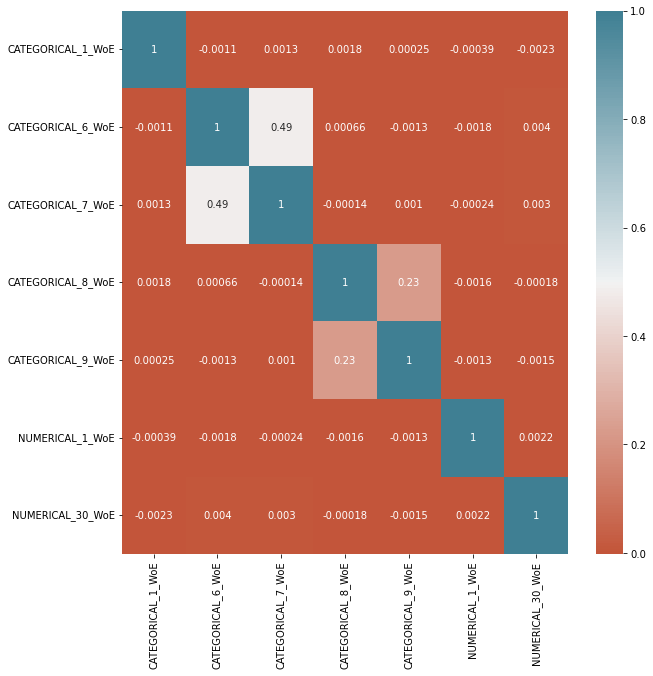

In [47]:
plt.figure(figsize=(10, 10))
correlation = X.corr()
sns.heatmap(X.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200))

In [48]:
#train and validation test, using stratified method for dependant variables)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify = training_data['TARGET'])
X_train.columns

Index(['CATEGORICAL_1_WoE', 'CATEGORICAL_6_WoE', 'CATEGORICAL_7_WoE',
       'CATEGORICAL_8_WoE', 'CATEGORICAL_9_WoE', 'NUMERICAL_1_WoE',
       'NUMERICAL_30_WoE'],
      dtype='object')

In [50]:
#instantiate model and train
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

# make predictions for validation set
y_train_predict = logit_model.predict(X_train)
y_pred = logit_model.predict(X_test)
accuracy_train_logit = accuracy_score(y_train, y_train_predict)
accuracy_test_logit = accuracy_score(y_test, y_pred)

y_pred_prob_train = logit_model.predict_proba(X_train)[:, 1]
y_pred_prob_test = logit_model.predict_proba(X_test)[:, 1]

auc_roc_score_train = metrics.roc_auc_score(y_train, y_pred_prob_train)
auc_roc_score_test = metrics.roc_auc_score(y_test, y_pred_prob_test)

gini_train_logit = 2*auc_roc_score_train - 1
gini_validation_logit = 2*auc_roc_score_test - 1
print("Logistic Regression")
print("Gini Train: %.2f%%" % (gini_train_logit  * 100.0))
print("Gini validation: %.2f%%" % (gini_validation_logit * 100.0))
print("Accuracy Train: %.2f%%" % (accuracy_train_logit  * 100.0))
print("Accuracy Validation: %.2f%%" % (accuracy_test_logit * 100.0))

Logistic Regression
Gini Train: 61.40%
Gini validation: 60.87%
Accuracy Train: 75.97%
Accuracy Validation: 75.81%


Performance evaluation of the model on the last month (May 2015), which would
be used as holdout testing data. Please include AUC-ROC among your evaluation
metrics

In [51]:
testing_data_X = testing_data[['CATEGORICAL_1_WoE',
       'CATEGORICAL_6_WoE', 'CATEGORICAL_7_WoE', 'CATEGORICAL_8_WoE',
       'CATEGORICAL_9_WoE', 'NUMERICAL_1_WoE', 'NUMERICAL_30_WoE'
]]
testing_data_Y = testing_data["TARGET"]

In [52]:
# make predictions for test set
y_predict = logit_model.predict(testing_data_X)
y_test = testing_data_Y

accuracy_test_logit = accuracy_score(y_test, y_predict)


y_pred_prob_test = logit_model.predict_proba(testing_data_X)[:, 1]


auc_roc_score_test = metrics.roc_auc_score(y_test, y_pred_prob_test)

gini_test_logit = 2*auc_roc_score_test - 1

print("Logistic Regression Evaluation")

print("Gini Test: %.2f%%" % (gini_test_logit  * 100.0))

print("Accuracy Validation: %.2f%%" % (accuracy_test_logit * 100.0))

Logistic Regression Evaluation
Gini Test: 4.04%
Accuracy Validation: 61.65%


C:\Users\TRANGQ~1\AppData\Local\Temp/ipykernel_14600/3639837790.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\TRANGQ~1\AppData\Local\Temp/ipykernel_14600/3639837790.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


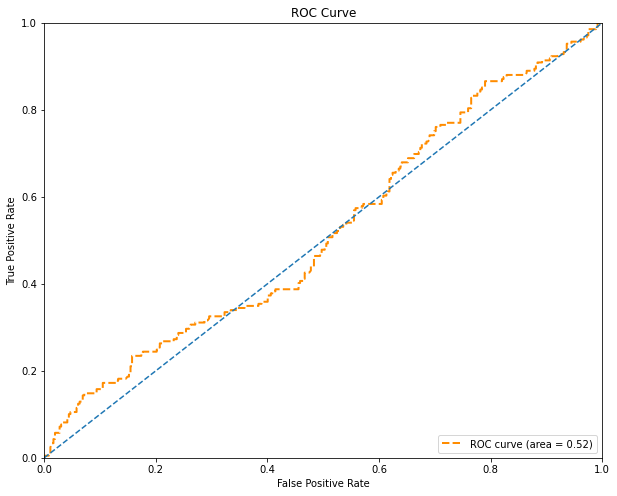

In [53]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = logit_model.predict_proba(testing_data_X)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

#### Random Forest  <a class="anchor" id="section_2_3"></a>

In [54]:
cols = df.columns[df.columns.str.endswith('WoE')]

In [55]:
# df = df.drop(columns =['CATEGORICAL_1_WoE', 'CATEGORICAL_6_WoE', 'CATEGORICAL_7_WoE',
#        'CATEGORICAL_8_WoE', 'CATEGORICAL_9_WoE', 'NUMERICAL_1_WoE',
#        'NUMERICAL_30_WoE'])

In [56]:
# Import label encoder
from sklearn import preprocessing

In [57]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['CATEGORICAL_0']= label_encoder.fit_transform(df['CATEGORICAL_0'])
df['CATEGORICAL_1']= label_encoder.fit_transform(df['CATEGORICAL_1'])
df['CATEGORICAL_6']= label_encoder.fit_transform(df['CATEGORICAL_6'])
df['CATEGORICAL_7']= label_encoder.fit_transform(df['CATEGORICAL_7'])
df['CATEGORICAL_8']= label_encoder.fit_transform(df['CATEGORICAL_8'])
df['CATEGORICAL_9']= label_encoder.fit_transform(df['CATEGORICAL_9'])
df['CATEGORICAL_10']= label_encoder.fit_transform(df['CATEGORICAL_10'])

In [58]:
df['DATE'] = pd.to_datetime(df['TIME']).dt.strftime('%Y-%m-%d')

In [59]:
testing_data = df.loc[df['DATE'] == '2015-05-31']

In [60]:
training_data = df.loc[df['DATE'] != '2015-05-31']

In [61]:
X = training_data.loc[:, 'NUMERICAL_0':'CATEGORICAL_10']
Y = training_data["TARGET"]
X.head()

,NUMERICAL_0,NUMERICAL_1,NUMERICAL_2,NUMERICAL_3,NUMERICAL_4,NUMERICAL_5,NUMERICAL_6,NUMERICAL_7,NUMERICAL_8,NUMERICAL_9,...,NUMERICAL_38,NUMERICAL_39,NUMERICAL_41,CATEGORICAL_0,CATEGORICAL_1,CATEGORICAL_6,CATEGORICAL_7,CATEGORICAL_8,CATEGORICAL_9,CATEGORICAL_10
0,0.548205,6.273278,-0.557716,-0.086105,-0.726799,-0.523021,0.571528,0.176804,-0.838352,-0.103013,...,-1.582633,-1.256936,1.433575,2,0,2,0,1,0,1
1,-0.640991,5.662506,0.050086,0.233125,0.482266,0.085460,-0.552130,-0.017248,-0.965931,0.849677,...,-1.384296,0.434467,-0.022775,1,2,0,0,0,1,1
2,0.394312,5.782492,-0.421450,0.756713,0.408276,0.327221,-0.905630,-0.941560,-0.428490,-0.600134,...,-1.816730,-0.491451,0.128277,0,0,2,2,1,1,1
3,-0.320658,4.736009,0.334894,1.092682,0.646294,1.541267,0.966884,-0.790725,-0.104912,-0.085229,...,0.021831,-0.323530,-0.134636,4,0,0,0,0,1,0
4,0.433235,5.323432,0.826207,0.718267,-1.627944,2.203108,0.420342,-0.223997,0.822779,0.602888,...,1.250560,-0.162953,-0.472046,1,2,1,1,1,1,1


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify = training_data['TARGET'])
X_train.columns

Index(['NUMERICAL_0', 'NUMERICAL_1', 'NUMERICAL_2', 'NUMERICAL_3',
       'NUMERICAL_4', 'NUMERICAL_5', 'NUMERICAL_6', 'NUMERICAL_7',
       'NUMERICAL_8', 'NUMERICAL_9', 'NUMERICAL_11', 'NUMERICAL_12',
       'NUMERICAL_13', 'NUMERICAL_14', 'NUMERICAL_15', 'NUMERICAL_16',
       'NUMERICAL_17', 'NUMERICAL_18', 'NUMERICAL_19', 'NUMERICAL_20',
       'NUMERICAL_21', 'NUMERICAL_22', 'NUMERICAL_23', 'NUMERICAL_24',
       'NUMERICAL_25', 'NUMERICAL_26', 'NUMERICAL_27', 'NUMERICAL_28',
       'NUMERICAL_29', 'NUMERICAL_30', 'NUMERICAL_31', 'NUMERICAL_32',
       'NUMERICAL_33', 'NUMERICAL_34', 'NUMERICAL_35', 'NUMERICAL_36',
       'NUMERICAL_37', 'NUMERICAL_38', 'NUMERICAL_39', 'NUMERICAL_41',
       'CATEGORICAL_0', 'CATEGORICAL_1', 'CATEGORICAL_6', 'CATEGORICAL_7',
       'CATEGORICAL_8', 'CATEGORICAL_9', 'CATEGORICAL_10'],
      dtype='object')

In [63]:
# cat_names = list(X_train.select_dtypes('object').columns)
# cat_names

In [64]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier().fit(X_train, y_train)
y_train_predict = random_forest.predict(X_train)
y_pred = random_forest.predict(X_test)

accuracy_train_forest = accuracy_score(y_train, y_train_predict)
accuracy_test_forest = accuracy_score(y_test, y_pred)


y_pred_prob_train = random_forest.predict_proba(X_train)[:, 1]
y_pred_prob_test = random_forest.predict_proba(X_test)[:, 1]
auc_roc_score_train = metrics.roc_auc_score(y_train, y_pred_prob_train)
auc_roc_score_test = metrics.roc_auc_score(y_test, y_pred_prob_test)

gini_train_rd = 2*auc_roc_score_train - 1
gini_validation_rd = 2*auc_roc_score_test - 1

print(" RandomForest ")
print("Gini Train: %.2f%%" % (gini_train_rd  * 100.0))
print("Gini Validation: %.2f%%" % (gini_validation_rd * 100.0))

# print("Accuracy: %.2f%%" % (accuracy_train_forest * 100.0))
# print("Accuracy: %.2f%%" % (accuracy_test_forest * 100.0))

 RandomForest 
Gini Train: 100.00%
Gini Validation: 67.94%


In [65]:
testing_data_X = testing_data[['NUMERICAL_0', 'NUMERICAL_1', 'NUMERICAL_2', 'NUMERICAL_3',
       'NUMERICAL_4', 'NUMERICAL_5', 'NUMERICAL_6', 'NUMERICAL_7',
       'NUMERICAL_8', 'NUMERICAL_9', 'NUMERICAL_11', 'NUMERICAL_12',
       'NUMERICAL_13', 'NUMERICAL_14', 'NUMERICAL_15', 'NUMERICAL_16',
       'NUMERICAL_17', 'NUMERICAL_18', 'NUMERICAL_19', 'NUMERICAL_20',
       'NUMERICAL_21', 'NUMERICAL_22', 'NUMERICAL_23', 'NUMERICAL_24',
       'NUMERICAL_25', 'NUMERICAL_26', 'NUMERICAL_27', 'NUMERICAL_28',
       'NUMERICAL_29', 'NUMERICAL_30', 'NUMERICAL_31', 'NUMERICAL_32',
       'NUMERICAL_33', 'NUMERICAL_34', 'NUMERICAL_35', 'NUMERICAL_36',
       'NUMERICAL_37', 'NUMERICAL_38', 'NUMERICAL_39', 'NUMERICAL_41',
       'CATEGORICAL_0', 'CATEGORICAL_1', 'CATEGORICAL_6', 'CATEGORICAL_7',
       'CATEGORICAL_8', 'CATEGORICAL_9', 'CATEGORICAL_10']]
testing_data_Y = testing_data["TARGET"]

In [66]:
# make predictions for test set
y_predict = random_forest.predict(testing_data_X)
y_test = testing_data_Y

accuracy_test_logit = accuracy_score(y_test, y_predict)


y_pred_prob_test = random_forest.predict_proba(testing_data_X)[:, 1]


auc_roc_score_test = metrics.roc_auc_score(y_test, y_pred_prob_test)

gini_test_rd = 2*auc_roc_score_test - 1

print("Random Forest Evaluation")

print("Gini Test: %.2f%%" % (gini_test_rd  * 100.0))

print("Accuracy Test: %.2f%%" % (auc_roc_score_test  * 100.0))



Random Forest Evaluation
Gini Test: 32.00%
Accuracy Test: 66.00%


C:\Users\TRANGQ~1\AppData\Local\Temp/ipykernel_14600/523033921.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\TRANGQ~1\AppData\Local\Temp/ipykernel_14600/523033921.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


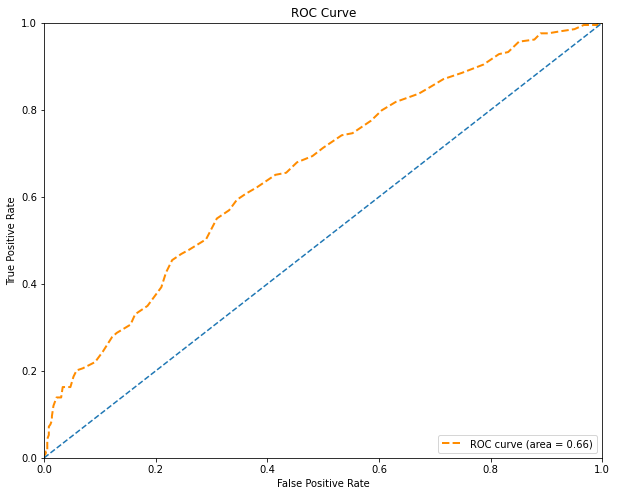

In [67]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = random_forest.predict_proba(testing_data_X)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

### MODEL COMPARISION  <a class="anchor" id="chapter3"></a>

In [68]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','RandomForest'],
       'Score on train': [gini_train_logit,gini_train_rd],
    'Score on validation': [gini_validation_logit,gini_validation_rd],
    'Score on test': [gini_test_logit,gini_test_rd]
})
models['% Gini difference'] = (models['Score on train'] - models['Score on test']) * 100.0
models.sort_values(by='Score on test', ascending=False)

,Model,Score on train,Score on validation,Score on test,% Gini difference
1,RandomForest,1.000000,0.679378,0.320019,67.998097
0,Logistic Regression,0.614028,0.608737,0.040406,57.362249


Text(0.5, 1.0, 'Scores Metrics Accuracy')

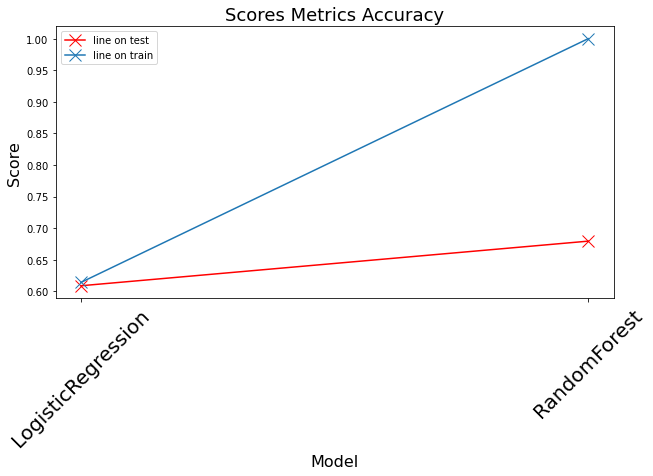

In [69]:
# Visualize accuracy train và validation
plt.figure(figsize=(10, 5))
all_score_train = [gini_train_logit,gini_train_rd]
all_score_val = [gini_validation_logit,gini_validation_rd]
model_names = ['LogisticRegression','RandomForest']

plt.plot(np.arange(len(all_score_val))+1, all_score_val, marker='x', markersize=12,color='red')
plt.plot(np.arange(len(all_score_train))+1, all_score_train, marker='x', markersize=12)

plt.legend(['line on test', 'line on train'])

plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)

plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=20)
plt.title("Scores Metrics Accuracy", fontsize=18)

=> Logistic has poor performance on testing sample, however, random forest is heavily overffing => try to optimize random forest by hyperameter tunning/ features selection pre-training

### Maximizing Chosen Model Performance  <a class="anchor" id="chapter4"></a>


#### Option1: Finetune hyperameter using Gridsearch CV <a class="anchor" id="section_4_1_1"></a>

In [70]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [86]:
# from sklearn.model_selection import GridSearchCV
# cv = GridSearchCV(rfc,parameters,cv=5)
# cv.fit(X_train,y_train.values.ravel())

In [ ]:
#https://www.datasciencelearner.com/how-to-improve-accuracy-of-random-forest-classifier/

In [ ]:
#This feature is available in the GridSearchCV. You can use cv. best_params_ to know the best parameters. 

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
# display(cv)

=>n_estimators = 100 and max_depth = 8 is best parameters as result of gridsearch

In [72]:
final_clf = RandomForestClassifier(n_estimators=100, max_depth=8,min_samples_split=2, random_state=0).fit(X_train, y_train)

In [91]:
X = training_data.loc[:, 'NUMERICAL_0':'CATEGORICAL_10']
Y = training_data["TARGET"]
X.head()

,NUMERICAL_0,NUMERICAL_1,NUMERICAL_2,NUMERICAL_3,NUMERICAL_4,NUMERICAL_5,NUMERICAL_6,NUMERICAL_7,NUMERICAL_8,NUMERICAL_9,...,NUMERICAL_38,NUMERICAL_39,NUMERICAL_41,CATEGORICAL_0,CATEGORICAL_1,CATEGORICAL_6,CATEGORICAL_7,CATEGORICAL_8,CATEGORICAL_9,CATEGORICAL_10
0,0.548205,6.273278,-0.557716,-0.086105,-0.726799,-0.523021,0.571528,0.176804,-0.838352,-0.103013,...,-1.582633,-1.256936,1.433575,2,0,2,0,1,0,1
1,-0.640991,5.662506,0.050086,0.233125,0.482266,0.085460,-0.552130,-0.017248,-0.965931,0.849677,...,-1.384296,0.434467,-0.022775,1,2,0,0,0,1,1
2,0.394312,5.782492,-0.421450,0.756713,0.408276,0.327221,-0.905630,-0.941560,-0.428490,-0.600134,...,-1.816730,-0.491451,0.128277,0,0,2,2,1,1,1
3,-0.320658,4.736009,0.334894,1.092682,0.646294,1.541267,0.966884,-0.790725,-0.104912,-0.085229,...,0.021831,-0.323530,-0.134636,4,0,0,0,0,1,0
4,0.433235,5.323432,0.826207,0.718267,-1.627944,2.203108,0.420342,-0.223997,0.822779,0.602888,...,1.250560,-0.162953,-0.472046,1,2,1,1,1,1,1


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify = training_data['TARGET'])
X_train.columns

Index(['NUMERICAL_0', 'NUMERICAL_1', 'NUMERICAL_2', 'NUMERICAL_3',
       'NUMERICAL_4', 'NUMERICAL_5', 'NUMERICAL_6', 'NUMERICAL_7',
       'NUMERICAL_8', 'NUMERICAL_9', 'NUMERICAL_11', 'NUMERICAL_12',
       'NUMERICAL_13', 'NUMERICAL_14', 'NUMERICAL_15', 'NUMERICAL_16',
       'NUMERICAL_17', 'NUMERICAL_18', 'NUMERICAL_19', 'NUMERICAL_20',
       'NUMERICAL_21', 'NUMERICAL_22', 'NUMERICAL_23', 'NUMERICAL_24',
       'NUMERICAL_25', 'NUMERICAL_26', 'NUMERICAL_27', 'NUMERICAL_28',
       'NUMERICAL_29', 'NUMERICAL_30', 'NUMERICAL_31', 'NUMERICAL_32',
       'NUMERICAL_33', 'NUMERICAL_34', 'NUMERICAL_35', 'NUMERICAL_36',
       'NUMERICAL_37', 'NUMERICAL_38', 'NUMERICAL_39', 'NUMERICAL_41',
       'CATEGORICAL_0', 'CATEGORICAL_1', 'CATEGORICAL_6', 'CATEGORICAL_7',
       'CATEGORICAL_8', 'CATEGORICAL_9', 'CATEGORICAL_10'],
      dtype='object')

In [93]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier().fit(X_train, y_train)
y_train_predict = final_clf.predict(X_train)
y_pred = final_clf.predict(X_test)

accuracy_train_forest = accuracy_score(y_train, y_train_predict)
accuracy_test_forest = accuracy_score(y_test, y_pred)


y_pred_prob_train = final_clf.predict_proba(X_train)[:, 1]
y_pred_prob_test = final_clf.predict_proba(X_test)[:, 1]
auc_roc_score_train = metrics.roc_auc_score(y_train, y_pred_prob_train)
auc_roc_score_test = metrics.roc_auc_score(y_test, y_pred_prob_test)

gini_train_rd = 2*auc_roc_score_train - 1
gini_test_rd = 2*auc_roc_score_test - 1

print(" RandomForest ")
print("Gini Train: %.2f%%" % (gini_train_rd  * 100.0))
print("Gini Test: %.2f%%" % (gini_test_rd * 100.0))

# print("Accuracy: %.2f%%" % (accuracy_train_forest * 100.0))
# print("Accuracy: %.2f%%" % (accuracy_test_forest * 100.0))

 RandomForest 
Gini Train: 66.86%
Gini Test: 67.29%


=> Final Random Forest with tunning can help reduce overfit and have better gini when compared with logistic regression => this will be final chosen models

In [94]:
# make predictions for test set
y_predict = final_clf.predict(testing_data_X)
y_test = testing_data_Y

accuracy_test_logit = accuracy_score(y_test, y_predict)


y_pred_prob_test = final_clf.predict_proba(testing_data_X)[:, 1]


auc_roc_score_test = metrics.roc_auc_score(y_test, y_pred_prob_test)

gini_test_rd = 2*auc_roc_score_test - 1

print("Random Forest Evaluation")

print("Gini Test: %.2f%%" % (gini_test_rd  * 100.0))

print("Accuracy Test: %.2f%%" % (auc_roc_score_test  * 100.0))



Random Forest Evaluation
Gini Test: 15.48%
Accuracy Test: 57.74%


C:\Users\TRANGQ~1\AppData\Local\Temp/ipykernel_14600/1390907391.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\TRANGQ~1\AppData\Local\Temp/ipykernel_14600/1390907391.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


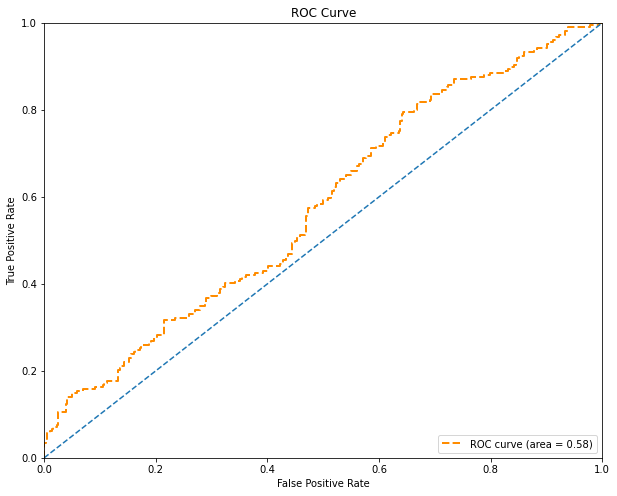

In [95]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = final_clf.predict_proba(testing_data_X)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

#### Option2: Using Feature Selection before training model <a class="anchor" id="section_4_1_2"></a>

In [77]:
feature_list = ['NUMERICAL_0', 'NUMERICAL_1', 'NUMERICAL_2', 'NUMERICAL_3',
       'NUMERICAL_4', 'NUMERICAL_5', 'NUMERICAL_6', 'NUMERICAL_7',
       'NUMERICAL_8', 'NUMERICAL_9', 'NUMERICAL_11', 'NUMERICAL_12',
       'NUMERICAL_13', 'NUMERICAL_14', 'NUMERICAL_15', 'NUMERICAL_16',
       'NUMERICAL_17', 'NUMERICAL_18', 'NUMERICAL_19', 'NUMERICAL_20',
       'NUMERICAL_21', 'NUMERICAL_22', 'NUMERICAL_23', 'NUMERICAL_24',
       'NUMERICAL_25', 'NUMERICAL_26', 'NUMERICAL_27', 'NUMERICAL_28',
       'NUMERICAL_29', 'NUMERICAL_30', 'NUMERICAL_31', 'NUMERICAL_32',
       'NUMERICAL_33', 'NUMERICAL_34', 'NUMERICAL_35', 'NUMERICAL_36',
       'NUMERICAL_37', 'NUMERICAL_38', 'NUMERICAL_39', 'NUMERICAL_41',
       'CATEGORICAL_0', 'CATEGORICAL_1', 'CATEGORICAL_6', 'CATEGORICAL_7',
       'CATEGORICAL_8', 'CATEGORICAL_9', 'CATEGORICAL_10']

In [78]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [79]:
# Get numerical feature importances
importances = list(random_forest.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CATEGORICAL_7        Importance: 0.08
Variable: CATEGORICAL_9        Importance: 0.08
Variable: NUMERICAL_1          Importance: 0.05
Variable: NUMERICAL_41         Importance: 0.05
Variable: CATEGORICAL_1        Importance: 0.04
Variable: NUMERICAL_30         Importance: 0.03
Variable: NUMERICAL_0          Importance: 0.02
Variable: NUMERICAL_2          Importance: 0.02
Variable: NUMERICAL_3          Importance: 0.02
Variable: NUMERICAL_4          Importance: 0.02
Variable: NUMERICAL_5          Importance: 0.02
Variable: NUMERICAL_6          Importance: 0.02
Variable: NUMERICAL_7          Importance: 0.02
Variable: NUMERICAL_8          Importance: 0.02
Variable: NUMERICAL_9          Importance: 0.02
Variable: NUMERICAL_11         Importance: 0.02
Variable: NUMERICAL_12         Importance: 0.02
Variable: NUMERICAL_13         Importance: 0.02
Variable: NUMERICAL_14         Importance: 0.02
Variable: NUMERICAL_15         Importance: 0.02
Variable: NUMERICAL_16         Importanc

In [80]:
X = X[['CATEGORICAL_7','CATEGORICAL_9','CATEGORICAL_1','NUMERICAL_1','NUMERICAL_41','NUMERICAL_30']]
Y

0         1
1         0
2         0
3         0
4         0
         ..
199424    0
199425    1
199426    0
199427    1
199428    0
Name: TARGET, Length: 199429, dtype: int64

In [81]:
# New random forest with only the 6 most important variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify = training_data['TARGET'])
X_train.columns

Index(['CATEGORICAL_7', 'CATEGORICAL_9', 'CATEGORICAL_1', 'NUMERICAL_1',
       'NUMERICAL_41', 'NUMERICAL_30'],
      dtype='object')

In [82]:
random_forest_best_variables = RandomForestClassifier().fit(X_train, y_train)


In [83]:
y_train_predict = random_forest_best_variables.predict(X_train)
y_pred = random_forest_best_variables.predict(X_test)

In [84]:
accuracy_train_forest = accuracy_score(y_train, y_train_predict)
accuracy_test_forest = accuracy_score(y_test, y_pred)

y_pred_prob_train = random_forest_best_variables.predict_proba(X_train)[:, 1]
y_pred_prob_test = random_forest_best_variables.predict_proba(X_test)[:, 1]
auc_roc_score_train = metrics.roc_auc_score(y_train, y_pred_prob_train)
auc_roc_score_test = metrics.roc_auc_score(y_test, y_pred_prob_test)

gini_train_rd = 2*auc_roc_score_train - 1
gini_validation_rd = 2*auc_roc_score_test - 1

print(" RandomForest ")
print("Gini Train: %.2f%%" % (gini_train_rd  * 100.0))
print("Gini Validation: %.2f%%" % (gini_validation_rd * 100.0))


 RandomForest 
Gini Train: 100.00%
Gini Validation: 62.38%


=> Option 2 can't help reduce overfit and option 1 will still be final chosen models

### UNDERSTAND THE MODEL <a class="anchor" id="chapter5"></a>


In [85]:
feature_importances = pd.DataFrame(final_clf.feature_importances_,  index =feature_list,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
CATEGORICAL_9,0.298337
CATEGORICAL_7,0.255948
CATEGORICAL_1,0.125308
NUMERICAL_41,0.085091
CATEGORICAL_6,0.062808
NUMERICAL_1,0.061541
NUMERICAL_30,0.036962
CATEGORICAL_8,0.022297
CATEGORICAL_10,0.004869
NUMERICAL_32,0.003521
